### Här skall vi ladda upp våra sparade modeller.

In [2]:
import joblib
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [3]:
#I denna cell kör vi samma som vi gjorde i träningsdelen, för att det ska vara samma datauppsättning.
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
X = mnist["data"]
y = mnist["target"].astype(np.uint8)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

In [4]:
# vi laddar in vår sparade tränade modell.
best_model = joblib.load('best_model.pkl')

#### Nedan är testning av datan

In [5]:
# Nu predikterar vi på testdatan och sätter det i y_pred
y_pred = best_model.predict(X_test_normalized)

# Utvärdera modellens prediktioner y_pred på y_test och skriver ut classification report.
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Testnoggrannhet för den bästa modellen: {test_accuracy:.4f}")
print()
report = classification_report(y_test, y_pred)
print(report)

Testnoggrannhet för den bästa modellen: 0.9720

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1343
           1       0.96      0.99      0.98      1600
           2       0.98      0.96      0.97      1380
           3       0.97      0.97      0.97      1433
           4       0.98      0.97      0.97      1295
           5       0.97      0.97      0.97      1273
           6       0.98      0.99      0.98      1396
           7       0.96      0.97      0.97      1503
           8       0.99      0.94      0.96      1357
           9       0.95      0.96      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



# Visualiserar prediktioner, både korrekt och felaktig.

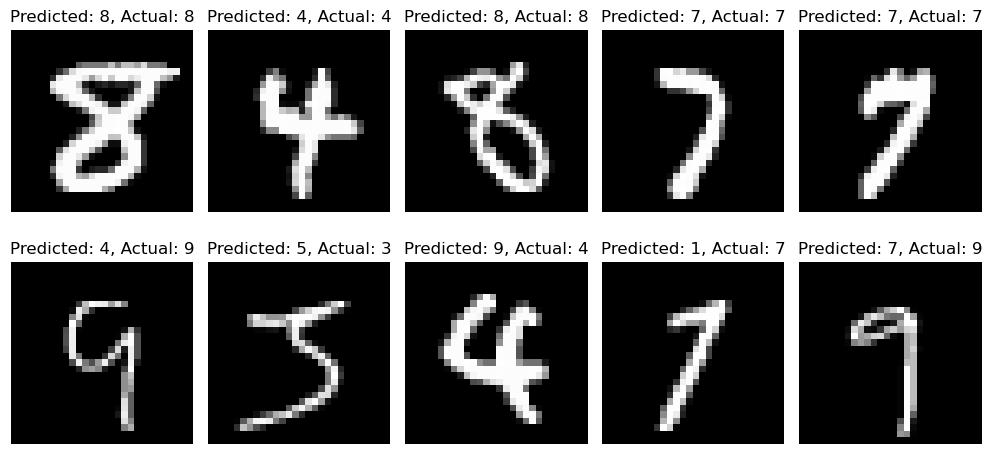

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#Sparar index av alla korrekta prediktioner och alla inkorrekta prediktioner
correct_predictions = np.where(y_pred == y_test)[0]
incorrect_predictions = np.where(y_pred != y_test)[0]

# Visa 5 korrekta prediktioner
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test_normalized[correct_predictions[i]].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {y_pred[correct_predictions[i]]}, Actual: {y_test[correct_predictions[i]]}")
    plt.axis('off')

# Visa 5 felaktiga prediktioner
for i in range(5):
    plt.subplot(2, 5, 5+i+1)
    plt.imshow(X_test_normalized[incorrect_predictions[i]].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {y_pred[incorrect_predictions[i]]}, Actual: {y_test[incorrect_predictions[i]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

Confusion Matrix:
[[1336    0    2    0    0    0    3    1    1    0]
 [   0 1592    2    0    1    1    0    3    0    1]
 [   7   16 1324    1    2    1    5   17    3    4]
 [   0    2   12 1383    1    8    2    7    8   10]
 [   3    7    1    0 1252    0    2    3    1   26]
 [   1    4    0   14    2 1235   12    0    2    3]
 [   5    1    0    0    4    5 1380    0    1    0]
 [   1   20    4    0    2    0    0 1461    1   14]
 [   3   12    3   19    2   17    4   10 1276   11]
 [   3    4    2    9   18    1    0   13    1 1369]]


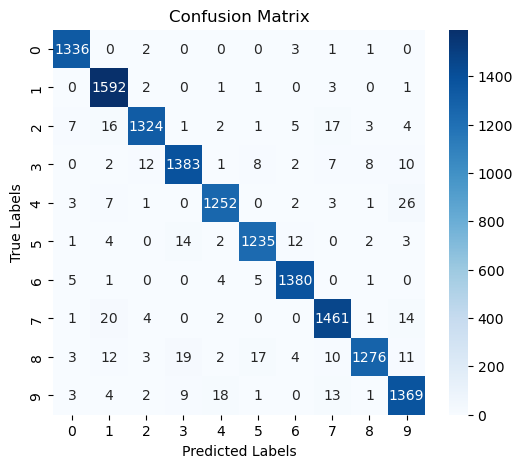

In [ ]:

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#Skapar en confusion matrix.
cm = confusion_matrix(y_test, y_pred)

#Skriver ut confusion matrix.
print("Confusion Matrix:")
print(cm)

#För lättare visualisering, skapar vi confusion matrix med seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2','3', '4', '5', '6', '7', '8', '9'], yticklabels=['0', '1', '2','3', '4', '5', '6', '7', '8', '9'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
